# Group Assignment: Formula 1 Data

Solve the questions regarding the `f1_data.csv` dataset. 

The full grade will be split as follows:
* 60 % notebook, code, and explanations of the questions
* 30 % presentation in class: quality of material, presentation, and Q&A
    * The presentation has to be about one specific driver, constructor, or circuit. Build a data-based history about the driver/circuit/constructor and present it.
    * You can present in any format you want: PPT, PDF, notebook, whatever
* 10 % visualization to support the answers and the presentation

The data is composed of the following variables:
* `car_number`: the number of the car
* `grid_starting_position`: the starting position of the car in the grid
* `final_position`: the position in which that driver ended
* `points`: the points earned by the driver in the race
* `laps`: the number of laps completed by the driver
* `total_race_time_ms`: the total time the driver took to complete the race in milliseconds
* `fastest_lap`: the fastest lap completed by the driver
* `rank`: the rank of the driver in the race
* `fastest_lap_time`: the time taken to complete the fastest lap
* `fastest_lap_speed`: the speed of the fastest lap
* `year`: the year of the race
* `race_number_season`: the number of the race in the season
* `race_name`: the name of the race
* `race_date`: the date of the race
* `race_start_time`: the start time of the race
* `circuit_name`: the name of the circuit where the race took place
* `circuit_location`: the location of the circuit
* `circuit_country`: the country where the circuit is located
* `circuit_lat`: the latitude of the circuit
* `circuit_lng`: the longitude of the circuit
* `circuit_altitude`: the altitude of the circuit
* `driver`: the name of the driver
* `driver_dob`: the date of birth of the driver
* `driver_nationality`: the nationality of the driver
* `constructor_name`: the name of the constructor team
* `constructor_nationality`: the nationality of the constructor team
* `status`: the status of the driver in the race (e.g., Finished, Did Not Finish, etc.)

**SUBMISSION: failing to comply with the submission format will result in a 0 grade**
* ONE (1) SINGLE ZIP FILE containing:
    * The notebook with the code and the answers
    * The presentation itself (PPT, PDF, notebook, whatever)
    * `f1_data.csv`
* The ZIP file should be named as follows: `group_assignment_<group_id>.zip`
  * For example, if you are group 1, the file should be named `group_assignment_1.zip`

### 0. Group Information

* Group ID: 3
* Members:
  * Anastasia Chapel.
  * Clara Sobejano.
  * Manuel Bonnelly.
  * Pablo Gallegos.
  * Yousef Joukhdar.

### 1. Basic operations. (1 point)

* Open the dataset as a pandas dataframe and show the first 10 rows




In [2]:
import pandas as pd

f1_data = pd.read_csv('f1_data.csv')

df = pd.DataFrame(f1_data)

print(df[:10])

   car_number  grid_starting_position  final_position  points  laps  \
0        22.0                       1             1.0    10.0    58   
1         3.0                       5             2.0     8.0    58   
2         7.0                       7             3.0     6.0    58   
3         5.0                      11             4.0     5.0    58   
4        23.0                       3             5.0     4.0    58   
5         8.0                      13             6.0     3.0    57   
6        14.0                      17             7.0     2.0    55   
7         1.0                      15             8.0     1.0    53   
8         4.0                       2             NaN     0.0    47   
9        12.0                      18             NaN     0.0    43   

   total_race_time_ms  fastest_lap  rank fastest_lap_time  fastest_lap_speed  \
0           5690616.0         39.0   2.0         1:27.452            218.300   
1           5696094.0         41.0   3.0         1:27.739 

* Show the number of rows and columns

In [3]:
print(df.shape)


(26080, 27)


* Show the data types of each column

In [4]:
print(df.dtypes)


car_number                 float64
grid_starting_position       int64
final_position             float64
points                     float64
laps                         int64
total_race_time_ms         float64
fastest_lap                float64
rank                       float64
fastest_lap_time            object
fastest_lap_speed          float64
year                         int64
race_number_season           int64
race_name                   object
race_date                   object
race_start_time             object
circuit_name                object
circuit_location            object
circuit_country             object
circuit_lat                float64
circuit_lng                float64
circuit_altitude           float64
driver                      object
driver_dob                  object
driver_nationality          object
constructor_name            object
constructor_nationality     object
status                      object
dtype: object


* Calculate a column called `age` which represents the age of each driver on the date of the race:
    * Hint1: use the `pd.to_datetime` function to convert the date columns to datetime
    * Hint2: use the `driver_dob` and substract from it the `race_date` column
    * Hint3: use the `dt.days` property to convert the result to days, then divide by 365.25 to get the age in years

In [ ]:

df['driver_dob'] = pd.to_datetime(df['driver_dob'])#, infer_datetime_format=True, errors='coerce')
df['race_date'] = pd.to_datetime(df['race_date']) #, infer_datetime_format=True, errors='coerce')
df['age'] = (df['race_date'] - df['driver_dob']).dt.days / 365.25

#checking if new column 'age' makes sense:
print(df.loc[0:10,['driver', 'driver_dob', 'race_date', 'age']])

                driver driver_dob  race_date        age
0       Lewis Hamilton 1985-01-07 2008-03-16  23.186858
1        Nick Heidfeld 1977-05-10 2008-03-16  30.850103
2         Nico Rosberg 1985-06-27 2008-03-16  22.718686
3      Fernando Alonso 1981-07-29 2008-03-16  26.631075
4    Heikki Kovalainen 1981-10-19 2008-03-16  26.406571
5      Kazuki Nakajima 1985-01-11 2008-03-16  23.175907
6   Sébastien Bourdais 1979-02-28 2008-03-16  29.045859
7       Kimi Räikkönen 1979-10-17 2008-03-16  28.413415
8        Robert Kubica 1984-12-07 2008-03-16  23.271732
9           Timo Glock 1982-03-18 2008-03-16  25.995893
10         Takuma Sato 1977-01-28 2008-03-16  31.129363


### 2. Why do we have missing values in the `final_position` column? (1 point)

In [6]:
print("There can be some cases in which the driver does not have an ending position. For example, if the driver had engine problems \nor an accident and his car had to be retired, he won't have an ending position. We will check the data to probe these cases.")

print("\nWe start by checking the unique values in the 'final_position' column:")
print(df['final_position'].unique())



There can be some cases in which the driver does not have an ending position. For example, if the driver had engine problems 
or an accident and his car had to be retired, he won't have an ending position. We will check the data to probe these cases.

We start by checking the unique values in the 'final_position' column:
[ 1.  2.  3.  4.  5.  6.  7.  8. nan  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33.]


In [7]:
print("As expected, the position in which the driver ended has integer values ranging from 1 to 33 and nulls (NaN). \nInteresting fact: Nowadays Formula 1 has 20 cars in the grid, being the rule 2 cars per constructor, but in the early days it allowed \nindepent competitors as long as they qualified. That's why the data goes from 1 to 33.")
print("\nNow we'll check for unique values in the 'status' column when 'final_position' is missing:")

unique_status_final_null = df.loc[df['final_position'].isna(), 'status'].unique()
print(unique_status_final_null)

As expected, the position in which the driver ended has integer values ranging from 1 to 33 and nulls (NaN). 
Interesting fact: Nowadays Formula 1 has 20 cars in the grid, being the rule 2 cars per constructor, but in the early days it allowed 
indepent competitors as long as they qualified. That's why the data goes from 1 to 33.

Now we'll check for unique values in the 'status' column when 'final_position' is missing:
['Collision' 'Accident' 'Transmission' 'Clutch' 'Engine' 'Electrical'
 'Hydraulics' 'Disqualified' 'Spun off' 'Gearbox' 'Radiator' 'Suspension'
 'Brakes' 'Overheating' 'Mechanical' 'Tyre' 'Driver Seat' 'Puncture'
 'Driveshaft' 'Retired' 'Fuel pressure' 'Front wing' 'Refuelling' 'Wheel'
 'Throttle' 'Steering' 'Electronics' 'Broken wing' 'Heat shield fire'
 'Exhaust' 'Oil leak' '+11 Laps' 'Technical' 'Wheel rim' 'Water leak'
 'Fuel pump' '+17 Laps' 'Oil pressure' 'Pneumatics' '+1 Lap' '+2 Laps'
 'Withdrew' '+12 Laps' 'Engine fire' '+26 Laps' 'Not classified'
 'Handling' '

In [9]:
print("Besides retiring a car from competition due to accidents or technical issues, there are other reasons a driver\nwill not have a finish position. For example, failing to qualify (ie, 'Did not qualify', 'Did not prequalify', etc)\nor being disqualified.")
print("In conclusion, 'final_position' will be a missing value when a driver does not even start a race, does not finish it\nor is disqualified.")


Besides retiring a car from competition due to accidents or technical issues, there are other reasons a driver
will not have a finish position. For example, failing to qualify (ie, 'Did not qualify', 'Did not prequalify', etc)
or being disqualified.
In conclusion, 'final_position' will be a missing value when a driver does not even start a race, does not finish it
or is disqualified.


### 3. Constructor analytics (3 points)

* Which constructor has the most race wins? (0.5 points)

In [9]:
print(df[df['final_position']== 1].groupby("constructor_name").size().sort_values(ascending=False))

print("\nGrouping by constructor, counting the number of times of 'final position' equal to 1, and sorting the result in descending order, \nshows that Ferrari has the most race wins in F1 (243).")

constructor_name
Ferrari            243
McLaren            179
Mercedes           125
Williams           114
Red Bull           104
Team Lotus          45
Renault             35
Benetton            27
Tyrrell             23
Brabham             23
Lotus-Climax        22
BRM                 17
Cooper-Climax       12
Lotus-Ford          11
Alfa Romeo          11
Vanwall             10
Ligier               9
Matra-Ford           9
Maserati             9
Brabham-Repco        8
Brawn                8
Kurtis Kraft         5
Jordan               4
McLaren-Ford         4
Watson               3
March                3
Wolf                 3
Honda                3
Cooper-Maserati      2
Cooper               2
Brabham-Climax       2
Brabham-Ford         2
Epperly              2
Lotus F1             2
BMW Sauber           1
Eagle-Weslake        1
AlphaTauri           1
Alpine F1 Team       1
Hesketh              1
Lotus-BRM            1
Kuzma                1
Penske               1
Porsche          

* Which constructor has the most podiums (position 1, 2, or 3)? (0.5 points)

In [10]:
print(df[(df['final_position']==1)|(df['final_position']==2)|(df['final_position']==3)].groupby("constructor_name").size().sort_values(ascending=False))

print("\nAgain, grouping by constructor, counting the numbre of times of 'final_position' being equal to 1, 2 or 3, and sorting the result in descending order, \nshows that Ferrari has the most podiums (813).")

constructor_name
Ferrari        813
McLaren        480
Williams       313
Mercedes       286
Red Bull       253
              ... 
Lancia           1
Connaught        1
Phillips         1
Onyx             1
Shadow-Ford      1
Length: 76, dtype: int64

Again, grouping by constructor, counting the numbre of times of 'final_position' being equal to 1, 2 or 3, and sorting the result in descending order, 
shows that Ferrari has the most podiums (813).


* Which constructor has the biggest probability of not finishing a race, according to the dataset? (0.5 points)

In [11]:
#The probability of not finishing a race is given by the number of times a driver from a constructor doesn't have a final position,
#divided by the number of total races that constructor participated in.
#In order to make this calculation, we will build two separate dataframes
#The first dataframe counts the number of times a constructor did not finish a race:
total_constructor_dnf = df[df['final_position'].isna()].groupby('constructor_name').size()

#The second dataframe counts the total number of races per constructor:
total_constructor_races = df.groupby('constructor_name').size()


#Now we calculate the probability of not finishing a race per constructor
dnf_probability = (total_constructor_dnf / total_constructor_races)

#In case a constructor finished all its races, it won't appear in the 'total_constructor_dnf' dataframe and will result in a null value,
#for this reason, we will fill those null values with 0:
dnf_probability = (total_constructor_dnf / total_constructor_races).fillna(0).reset_index(name='DNF Prob')


print(dnf_probability.sort_values(by='DNF Prob', ascending=False))



      constructor_name  DNF Prob
9          Andrea Moda       1.0
3                Adams       1.0
12      Arzani-Volpini       1.0
13   Aston Butterworth       1.0
8                 Amon       1.0
..                 ...       ...
141          Meskowski       0.0
176            Sherman       0.0
163                Rae       0.0
147              Olson       0.0
206          Wetteroth       0.0

[210 rows x 2 columns]


In [12]:
#There are 200 constructors that didn't finish any of their races:
print(dnf_probability[dnf_probability['DNF Prob']==1])


         constructor_name  DNF Prob
3                   Adams       1.0
8                    Amon       1.0
9             Andrea Moda       1.0
10                Apollon       1.0
12         Arzani-Volpini       1.0
13      Aston Butterworth       1.0
19               BRM-Ford       1.0
22                Bellasi       1.0
32                 Bromme       1.0
33                Bugatti       1.0
36              Cisitalia       1.0
39                 Connew       1.0
41             Cooper-ATS       1.0
42      Cooper-Alfa Romeo       1.0
48            Cooper-Ford       1.0
50            Cooper-OSCA       1.0
52              De Tomaso       1.0
53   De Tomaso-Alfa Romeo       1.0
54      De Tomaso-Ferrari       1.0
55         De Tomaso-Osca       1.0
57                Del Roy       1.0
58             Derrington       1.0
60                    EMW       1.0
65                  Elder       1.0
72               Ferguson       1.0
80                    Fry       1.0
86                   Hall   

* Which country has the most successful constructors in terms of race victories? (0.5 points)

In [13]:
#A race win means finish_position equal to one and the dataset contains a column with the constructor nationality.
#We just need to count the number of ocurrences and group by constructor nationality.

print(df[df['final_position']==1].groupby('constructor_nationality').size().sort_values(ascending=False))

#If we want to know those constructors:
print(df[df['final_position']==1].groupby(['constructor_nationality','constructor_name']).size())


constructor_nationality
British     494
Italian     281
German      127
Austrian    104
French       54
American     13
Swiss        11
Irish         4
Canadian      3
Japanese      3
dtype: int64
constructor_nationality  constructor_name
American                 Eagle-Weslake         1
                         Epperly               2
                         Kurtis Kraft          5
                         Kuzma                 1
                         Penske                1
                         Watson                3
Austrian                 Red Bull            104
British                  BRM                  17
                         Brabham              23
                         Brabham-Climax        2
                         Brabham-Ford          2
                         Brabham-Repco         8
                         Brawn                 8
                         Cooper                2
                         Cooper-Climax        12
                         C

In [14]:

#A better way to display the data requires step by step counting and then merging:
constructor_wins = df[df['final_position']==1].groupby(['constructor_nationality','constructor_name']).size().reset_index(name='Constructor Wins')
constructor_nationality_wins = df[df['final_position']==1].groupby('constructor_nationality').size().reset_index(name='Nationality Wins')
merged_df = constructor_wins.merge(constructor_nationality_wins, on='constructor_nationality')


merged_df.sort_values(by=['Nationality Wins','Constructor Wins'], ascending=[False,False])


,constructor_nationality,constructor_name,Constructor Wins,Nationality Wins
22,British,McLaren,179,494
30,British,Williams,114,494
27,British,Team Lotus,45,494
8,British,Brabham,23,494
28,British,Tyrrell,23,494
19,British,Lotus-Climax,22,494
7,British,BRM,17,494
14,British,Cooper-Climax,12,494
20,British,Lotus-Ford,11,494
29,British,Vanwall,10,494


* Which are the current constructors (from 2023) with the longest history in Formula 1? (0.5 points)

In [15]:
#if we answer this question by looking in the dataset seeking the earliest year in which the name of the constructor appears,
#we will make a mistake by picking Mercedes as one of the oldest teams, because they withdrew from F1 in 1955 and rejoined in 2010.
#the correct answer to this question is counting the number of different years in which the name of the constructor appears.

#we first define current constructors (those in year 2023):
current_constructors = df.loc[df['year']==2023, 'constructor_name'].unique()

#we can do this by grouping by constructor name and using 'nunique' to count the number of distinct years
constructor_years = df.groupby('constructor_name')['year'].nunique().reset_index(name='Years in F1')

#and now we can restrict it to current constructors:
current_constructor_years = constructor_years[constructor_years['constructor_name'].isin(current_constructors)].sort_values(by='Years in F1',ascending=False)


print(current_constructor_years)
print('\nCurrent teams with the longest history in Formula 1 are Ferrari, McLaren, and Williams.')



    constructor_name  Years in F1
73           Ferrari           74
134          McLaren           54
207         Williams           48
165         Red Bull           19
139         Mercedes           16
4         Alfa Romeo           16
85      Haas F1 Team            8
14      Aston Martin            5
5         AlphaTauri            4
6     Alpine F1 Team            3

Current teams with the longest history in Formula 1 are Ferrari, McLaren, and Williams.


* Which is the constructor with the most drivers in Formula 1 across its history? (0.5 points)

In [16]:
#again, we group by constructor_name and use nunique to count the number of distinct drivers
constructor_drivers_count = df.groupby('constructor_name')['driver'].nunique().reset_index(name='Different Drivers')

#and sort it in descending order
constructor_drivers_count.sort_values(by='Different Drivers', ascending=False)



,constructor_name,Different Drivers
73,Ferrari,97
130,Maserati,92
96,Kurtis Kraft,87
18,BRM,70
207,Williams,61
...,...,...
188,Sutton,1
191,Tec-Mec,1
199,Trojan,1
200,Turner,1


### 4. Driver analytics (3 points)

* With the data available, who is the fastest driver in Formula 1? (0.5 point)


In [17]:
#as the word "fastest" points to speed only and not results, this question will be answered by calcuting 
#the average number of times each driver has gotten the fastest lap in a race.
#this involves first counting the number of fastest laps a driver has gotten in his career,
#and then dividing it by the total number of races that driver has participated in.

#we begin by cleaning the dataset by dropping NaN values in fastest_lap_time and converting this column to total seconds format.

f1_data_cleaned = df.dropna(subset=['fastest_lap_time']).copy()

def convert_time_to_seconds(time_str):
    minutes, seconds = time_str.split(":")
    return int(minutes) * 60 + float(seconds)

f1_data_cleaned['fastest_lap_seconds'] = f1_data_cleaned['fastest_lap_time'].apply(convert_time_to_seconds)

#grouping data by circuit and year for minimum fastest lap time:
fastest_laps = f1_data_cleaned.loc[
    f1_data_cleaned.groupby(['race_date'])['fastest_lap_seconds'].idxmin()
]

fastest_laps_driver = fastest_laps.groupby('driver').size()
#number of races per driver:
races_driver = df.groupby('driver').size()

avg_fastest_lap_driver = (fastest_laps_driver/races_driver).fillna(0).sort_values(ascending=False)

print(avg_fastest_lap_driver)
print("\nAs the driver with the greatest average fastest laps in his career, Lewis Hamilton is the fastest driver in F1.")


driver
Lewis Hamilton       0.195652
Max Verstappen       0.154286
Sebastian Vettel     0.126667
Kimi Räikkönen       0.119318
Nico Rosberg         0.097087
                       ...   
Zsolt Baumgartner    0.000000
Élie Bayol           0.000000
Éric Bernard         0.000000
Érik Comas           0.000000
Wayne Weiler         0.000000
Length: 857, dtype: float64

As the driver with the greatest average fastest laps in his career, Lewis Hamilton is the fastest driver in F1.


* Which is the driver with the most podiums without a win (position 2 or 3)? (0.5 point)


In [18]:
#we will approach this question step by step.
#first we will identify the drivers who have never won a race by substracting the winners from the dataset.

winner_drivers = df[df['final_position']==1 ]['driver'].unique()
loser_drivers = df[~df['driver'].isin(winner_drivers)]

#now we filter this data for podium positions only:
podiums = loser_drivers[loser_drivers['final_position'].isin([2,3])]

#now we group this data (only podiums) by driver, counting each appearance and sorting in descending order
podium_driver = podiums.groupby('driver').size().reset_index(name='Podium Appearances').sort_values(by='Podium Appearances', ascending=False)

print(podium_driver)
print('\nThe driver with the most podiums who has never won a race is Nick Heidfeld.')

                driver  Podium Appearances
64       Nick Heidfeld                  13
86    Stefan Johansson                  12
12          Chris Amon                  11
82     Romain Grosjean                  10
32          Jean Behra                   9
..                 ...                 ...
95   Tony Bettenhausen                   1
97       Trevor Taylor                   1
99       Vitaly Petrov                   1
100     Willy Mairesse                   1
101       Éric Bernard                   1

[102 rows x 2 columns]

The driver with the most podiums who has never won a race is Nick Heidfeld.


* Calculate the historical probability of each country of having a driver in the podium (0.5 point)


In [19]:
#for each distinct driver_nationality, we will calculate the number of podiums and the number of total races to divide them.

#we begin by grouping the dataset by driver_nationality for final_position being 1, 2 or 3.
nationality_podiums = df[df['final_position'].isin([1,2,3])].groupby('driver_nationality').size().sort_values(ascending=False)

#now we group by nationality without the podium condition (total races)
nationality_races = df.groupby('driver_nationality').size().sort_values(ascending=False)

#now we divide both. in cases were no driver of that nationality got a podium, it won't appear in nationality_podium and will return NaN,
#that's why we will replace NaN with 0 (no podium, 0 probability).
nationality_podium_probability = (nationality_podiums / nationality_races).fillna(0).reset_index(name='Podium Probability').sort_values(by='Podium Probability',ascending=False)

nationality_podium_probability

,driver_nationality,Podium Probability
2,Argentine,0.262735
12,Colombian,0.240000
17,Finnish,0.211389
29,Monegasque,0.194444
15,Dutch,0.181275
30,New Zealander,0.179293
19,German,0.173205
35,South African,0.171429
5,Austrian,0.171014
8,British,0.167041


* Calculate the historical probability of each country of having a driver win a race (0.5 point)


In [20]:
#similar to last exercise, for each distinct driver_nationality, we will calculate the number of wins and the number of total races to divide them.

#first we group the dataset by driver_nationality for final_position being 1.
nationality_wins = df[df['final_position']==1].groupby('driver_nationality').size().sort_values(ascending=False)

#we use the same variable as before for total races by nationality:
nationality_races = df.groupby('driver_nationality').size().sort_values(ascending=False)

#now we divide both. in cases were no driver of that nationality won a race, it won't appear in nationality_wins and will return NaN,
#that's why we will replace NaN with 0 (no wins, 0 probability).
nationality_win_probability = (nationality_wins / nationality_races).fillna(0).reset_index(name='Win Probability').sort_values(by='Win Probability',ascending=False)

nationality_win_probability

,driver_nationality,Win Probability
2,Argentine,0.101877
15,Dutch,0.089641
19,German,0.074708
8,British,0.069376
5,Austrian,0.059420
12,Colombian,0.056000
7,Brazilian,0.051715
4,Australian,0.051497
17,Finnish,0.049180
35,South African,0.047619


* Which driver was the youngest to win a race? (0.5 point)


In [21]:
#as we already added the 'age' column, we will filter the dataset by final_position being 1 and will sort it by 'age' ascending order:

winners_sorted_by_age = df[df['final_position']==1].sort_values(by='age')

print(winners_sorted_by_age['driver'])

print('\nYoungest drive to win a race is Max Verstappen.')

23000    Max Verstappen
23657    Max Verstappen
23717    Max Verstappen
23937    Max Verstappen
24137    Max Verstappen
              ...      
18736       Juan Fangio
18790       Juan Fangio
18824       Juan Fangio
19555       Nino Farina
19917     Luigi Fagioli
Name: driver, Length: 1094, dtype: object

Youngest drive to win a race is Max Verstappen.


* Which drivers are the current ones with the longest history in Formula 1? (0.5 point)

Hint: remember that a probability is calculated as the number of times an event happened divided by the total number of events

In [22]:
#we will group by driver name and using 'nunique' to count the number of distinct years of appearance.
driver_years = df.groupby('driver')['year'].nunique().reset_index(name='Years in F1').sort_values(by='Years in F1', ascending=False)

#now we define current drivers (year 2023):
current_drivers = df.loc[df['year']==2023, 'driver'].unique()

#now we restrict driver_years to current drivers only:
current_driver_years = driver_years[driver_years['driver'].isin(current_drivers)].sort_values(by='Years in F1',ascending=False)

current_driver_years


,driver,Years in F1
256,Fernando Alonso,20
521,Lewis Hamilton,17
170,Daniel Ricciardo,13
764,Sergio Pérez,13
610,Nico Hülkenberg,12
827,Valtteri Bottas,11
499,Kevin Magnussen,9
128,Carlos Sainz,9
568,Max Verstappen,9
246,Esteban Ocon,7


### 5. Circuit analytics (2 points)

* Which would you say is the toughest circuit in Formula 1? (0.5 point)

In [23]:
# for us, the thoughest circuit is the one that has not been finished, in average, by the greatest number of drivers.
# to calculate this, we will count the number of 'final_position' with null values in it, grouped by circuit,
# and then we will count the number of times each circuit has been raced (counting years grouped by circuit)

circuit_no_finish = df[df['final_position'].isna()].groupby('circuit_name').size().reset_index(name='DNFs')
circuit_years = df.groupby('circuit_name')['year'].nunique().reset_index(name="Circuit Years")

circuit_avg_no_finish = circuit_no_finish.merge(circuit_years, on='circuit_name')
circuit_avg_no_finish['avg_dnf']= circuit_avg_no_finish['DNFs']/circuit_avg_no_finish['Circuit Years']
print(circuit_avg_no_finish.sort_values(by="avg_dnf", ascending=False))

print("\n24 not finishing cars on average doesn't make sense. We will check the status column for Phoenix Street Circuit\nto see what's behind.\n")

print(df.loc[df['circuit_name']=='Phoenix street circuit', 'status'].unique())

#we will exclude status 'Did not prequalify', 'Disqualified', 'Did not qualify', from the previouos calculations as they are not related to the circuit
print('\n')
excluded_statuses = ['Did not prequalify', 'Disqualified', 'Did not qualify']
circuit_no_finish_statusfilt = df[(df['final_position'].isna() & ~df['status'].isin(excluded_statuses))].groupby('circuit_name').size().reset_index(name='Total DNFs')

dnf_years_circuit = circuit_no_finish_statusfilt.merge(circuit_years, on='circuit_name')
dnf_years_circuit['avg_dnf']= (dnf_years_circuit['Total DNFs']/dnf_years_circuit['Circuit Years'])
print(dnf_years_circuit.sort_values(by='avg_dnf', ascending=False))

print('\nFair Park should be considerd the toughest circuit, but it was raced one year only. On the other hand, \nwith 7 years of history and almost the same average DNF, Detroit Street Circuit stands out \nas the most challenging circuit in F1.')

                             circuit_name  DNFs  Circuit Years    avg_dnf
58                 Phoenix street circuit    72              3  24.000000
35                              Fair Park    18              1  18.000000
47                             Long Beach   137              8  17.125000
9   Autódromo Internacional Nelson Piquet   171             10  17.100000
32                 Detroit Street Circuit   119              7  17.000000
..                                    ...   ...            ...        ...
73                     Yas Marina Circuit    41             14   2.928571
71                Valencia Street Circuit    13              5   2.600000
48           Losail International Circuit     2              1   2.000000
50          Miami International Autodrome     3              2   1.500000
10     Autódromo Internacional do Algarve     2              2   1.000000

[76 rows x 4 columns]

24 not finishing cars on average doesn't make sense. We will check the status column for

* Which circuit requires the most f1 experience to win? (0.5 point)

In [24]:
# to answer this question, we will create a new column called 'years_in_f1' that shows the difference between a driver's
# first F1 appearance with the date of the race, then we will calculate the average years in f1 per circuit to reach
# final_position 1

# driver and first f1 appearance:
first_year_f1 = df.groupby('driver')['race_date'].min().reset_index(name='first_date')

#merge our df to add this new column 'first_date'
f1_new = df.merge(first_year_f1, on='driver')

#difference in days between race date and first date in days, divided by 365.25 as in the first exercise to have it in years.
f1_new['years_in_f1'] = (f1_new['race_date']-f1_new['first_date']).dt.days/365.25

# now we will group by circuit with final_position==1, displaying the mean of years_in_f1.
f1_new[f1_new['final_position']==1].groupby('circuit_name')['years_in_f1'].mean().sort_values(ascending=False)





circuit_name
Losail International Circuit            14.680356
Autódromo Internacional do Algarve      13.865845
Autodromo Internazionale del Mugello    13.492129
Le Mans                                 11.961670
Jeddah Corniche Circuit                 11.243441
                                          ...    
Zeltweg                                  3.181383
Nivelles-Baulers                         2.848734
Circuit Bremgarten                       2.067625
Circuit de Pedralbes                     1.898700
Sebring International Raceway            1.357974
Name: years_in_f1, Length: 76, dtype: float64

* Which circuit and year saw the most number of non-finishers? (0.5 point)

In [25]:
#we will count number of NaN values in 'final_position' excluding statuses 'Did not prequalify', 'Disqualified', 'Did not qualify'

excluded_statuses = ['Did not prequalify', 'Disqualified', 'Did not qualify']
circuit_no_finish = df[(df['final_position'].isna() & ~df['status'].isin(excluded_statuses))].groupby(['circuit_name', 'year']).size().reset_index(name='DNFs')
circuit_no_finish.sort_values(by='DNFs', ascending=False)
print(circuit_no_finish.sort_values(by='DNFs', ascending=False))
print('In 1961 Autodromo Nazionale di Monza saw 26 non-finishers.')

                      circuit_name  year  DNFs
86    Autodromo Nazionale di Monza  1961    26
684    Indianapolis Motor Speedway  1951    25
687    Indianapolis Motor Speedway  1954    23
75    Autodromo Nazionale di Monza  1950    21
592         Detroit Street Circuit  1984    20
...                            ...   ...   ...
1018                Suzuka Circuit  2015     1
1021                Suzuka Circuit  2019     1
1058            Yas Marina Circuit  2020     1
1053            Yas Marina Circuit  2015     1
1057            Yas Marina Circuit  2019     1

[1072 rows x 3 columns]
In 1961 Autodromo Nazionale di Monza saw 26 non-finishers.


* For each constructor, which is their best circuit in terms of amount of podiums? (0.5 point)

In [26]:
#a podium means finishing 1, 2 or 3.
podium_finishes = df[df['final_position'].isin([1, 2, 3])]

# now we grup the data by circuit and constructor, counting the number of podium finishes
podium_counts = podium_finishes.groupby(['circuit_name', 'constructor_name']).size().reset_index(name='Podium Count').sort_values(by='constructor_name')

max_podiums_per_constructor = podium_counts.loc[podium_counts.groupby('constructor_name')['Podium Count'].idxmax()]
max_podiums_per_constructor.sort_values(by='Podium Count', ascending=False)

,circuit_name,constructor_name,Podium Count
59,Autodromo Nazionale di Monza,Ferrari,73
71,Autodromo Nazionale di Monza,McLaren,28
420,Hockenheimring,Williams,21
442,Indianapolis Motor Speedway,Kurtis Kraft,19
687,Silverstone Circuit,Mercedes,19
...,...,...,...
611,Red Bull Ring,Shadow-Ford,1
213,Circuit Bremgarten,Talbot-Lago,1
80,Autodromo Nazionale di Monza,Surtees,1
191,Brands Hatch,Toleman,1


## Code for the presentation goes here

Build a data-based history about a driver/circuit/constructor and present it using your preferred format. You can use any of the data available in the dataset.

Examples:
* The most successful driver in Formula 1 history
* Why Monaco is the most difficult circuit in Formula 1
* The history of Ferrari in Formula 1
* ...

# Ferrari's irregular performance over its history: the rise of the Kaiser and the arrival of "Il Predestinato".

In [27]:
#we will start by summing the points each constructor scored each year.
points_by_constructor = df.groupby(['constructor_name', 'year'])['points'].sum().reset_index()

#we can also query only the top scorer of points for each season.
constructor_top = points_by_constructor.loc[
    points_by_constructor.groupby('year')['points'].idxmax()
]

#with this data we can easily count the number of championships per constructor:
print(constructor_top.groupby('constructor_name').size().reset_index(name="Times at the Top").sort_values(by="Times at the Top",ascending=False),"\n\nThis doesn't count as the number of titles as the Constructor's Championship was awarded only for the points\nof the top-scoring driver per team before 1979. In any case, historically Ferrari is the most successful team in F1, \nbut it has had periods of ups and down.")

   constructor_name  Times at the Top
6           Ferrari                22
17         Williams                 9
12         Mercedes                 9
11          McLaren                 9
13         Red Bull                 6
1               BRM                 3
14          Renault                 2
3     Brabham-Repco                 2
5     Cooper-Climax                 2
16          Tyrrell                 2
0        Alfa Romeo                 1
9          Maserati                 1
7      Lotus-Climax                 1
4             Brawn                 1
2          Benetton                 1
8        Lotus-Ford                 1
10       Matra-Ford                 1
15       Team Lotus                 1 

This doesn't count as the number of titles as the Constructor's Championship was awarded only for the points
of the top-scoring driver per team before 1979. In any case, historically Ferrari is the most successful team in F1, 
but it has had periods of ups and down.


decade  constructor_name
1950    Alfa Romeo          1
        Cooper-Climax       1
        Ferrari             6
        Maserati            1
        Mercedes            1
1960    BRM                 3
        Brabham-Repco       2
        Cooper-Climax       1
        Ferrari             1
        Lotus-Climax        1
        Lotus-Ford          1
        Matra-Ford          1
1970    Ferrari             6
        McLaren             1
        Team Lotus          1
        Tyrrell             2
1980    Ferrari             2
        McLaren             4
        Williams            4
1990    Benetton            1
        Ferrari             1
        McLaren             3
        Williams            5
2000    Brawn               1
        Ferrari             6
        McLaren             1
        Renault             2
2010    Mercedes            6
        Red Bull            4
2020    Mercedes            2
        Red Bull            2
dtype: int64


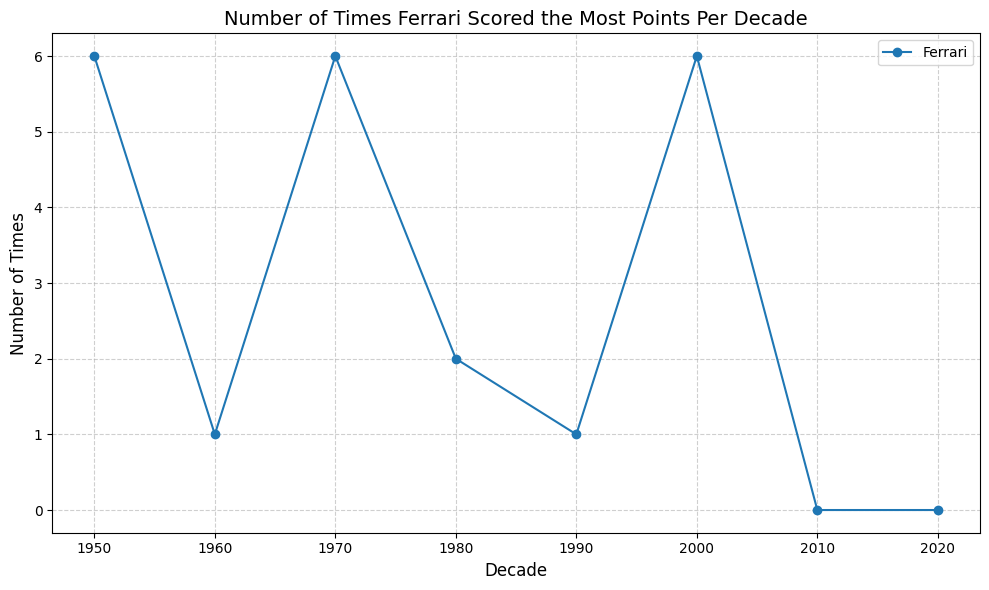


As you can see, Ferrari monopolized Formula 1 during the 50s, had a slump in the 60s and returned to glory in the 70s.
After that, two decades of poor performance followed, until the 2000s arrived, bringing great success back to the Scuderia.
Unfortunately, since then, Mercedes and Red Bull have completely overshadowed Ferrari.


In [28]:
#for a better understanding of Ferrari's performance over the years, we will group the data by decades:

constructor_top['decade'] = (constructor_top['year'] // 10) * 10

print(constructor_top.groupby(['decade','constructor_name']).size())


import matplotlib.pyplot as plt

constructor_top_count = constructor_top.groupby(['decade', 'constructor_name']).size().reset_index(name='Count')

ferrari_data = constructor_top_count[constructor_top_count['constructor_name'] == 'Ferrari']

missing_rows = pd.DataFrame({
    'decade': [2010, 2020],
    'constructor_name': 'Ferrari',
    'Count': 0
})

ferrari_data = pd.concat([ferrari_data, missing_rows], ignore_index=True).sort_values(by='decade')

plt.figure(figsize=(10, 6))
plt.plot(ferrari_data['decade'], ferrari_data['Count'], marker='o', label='Ferrari')
plt.title('Number of Times Ferrari Scored the Most Points Per Decade', fontsize=14)
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Number of Times', fontsize=12)
plt.xticks(ferrari_data['decade'])
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


print("\nAs you can see, Ferrari monopolized Formula 1 during the 50s, had a slump in the 60s and returned to glory in the 70s.")
print("After that, two decades of poor performance followed, until the 2000s arrived, bringing great success back to the Scuderia.\nUnfortunately, since then, Mercedes and Red Bull have completely overshadowed Ferrari.")


In [29]:
#what happened in Ferrari during the 2000s?
ferrari_data_2000_2009 = df[
    (df['constructor_name'] == 'Ferrari') & 
    (df['year'].between(2000, 2009))
]

ferrari_driver_performance = ferrari_data_2000_2009.groupby('driver').agg({
    'points': ['sum', 'mean'], 
    'final_position': lambda x: (x == 1).sum()
}).reset_index()

ferrari_driver_performance.columns = ['Driver', 'Total Points', 'Average Points', 'Wins']

ferrari_driver_performance_sorted = ferrari_driver_performance.sort_values(
    by=['Wins', 'Average Points'], ascending=[False, False]
)

print(ferrari_driver_performance_sorted)
print("\nLooks like the driver who contributed the most to the team during this decade was Michael Schumacher.\nLet's dive into his career:")




                 Driver  Total Points  Average Points  Wins
4    Michael Schumacher         799.0        6.549180    56
0          Felipe Massa         293.0        4.650794    11
2        Kimi Räikkönen         233.0        4.480769     9
5    Rubens Barrichello         412.0        3.961538     9
1  Giancarlo Fisichella           0.0        0.000000     0
3           Luca Badoer           0.0        0.000000     0

Looks like the driver who contributed the most to the team during this decade was Michael Schumacher.
Let's dive into his career:


In [41]:
schumacher_data = df[
    (df['driver'] == 'Michael Schumacher') &
    (df['year'].between(1991, 2006))
]

schumacher_summary = schumacher_data.groupby('year').agg({
    'points': 'sum',  # Total points per year
    'final_position': lambda x: (x == 1).sum()  # Total wins per year
}).reset_index()

schumacher_summary.rename(columns={
    'points': 'Points',
    'final_position': 'Wins'
}, inplace=True)

points_by_driver_year = f1_data.groupby(['driver', 'year'])['points'].sum().reset_index()
driver_champions = points_by_driver_year.loc[points_by_driver_year.groupby('year')['points'].idxmax()]

schumacher_summary['Champion'] = schumacher_summary['year'].apply(
    lambda year: driver_champions[
        (driver_champions['driver'] == 'Michael Schumacher') & (driver_champions['year'] == year)
    ].shape[0] > 0
)

schumacher_summary.insert(1, 'Driver', 'Michael Schumacher')


schumacher_summary

,year,Driver,Points,Wins,Champion
0,1991,Michael Schumacher,4.0,0,False
1,1992,Michael Schumacher,53.0,1,False
2,1993,Michael Schumacher,52.0,1,False
3,1994,Michael Schumacher,92.0,8,True
4,1995,Michael Schumacher,102.0,9,True
5,1996,Michael Schumacher,59.0,3,False
6,1997,Michael Schumacher,78.0,5,False
7,1998,Michael Schumacher,86.0,6,False
8,1999,Michael Schumacher,44.0,2,False
9,2000,Michael Schumacher,108.0,9,True


In [31]:
print("So, before joining Ferrari in 1996, Schumacher had already been crowned World Champion twice.\nAfter joining Ferrari he spent 4 years without titles, but from 2000 to 2004 he won the Driver's Championship \nfive consecutive times. Schumacher retired in 2006.")
print("What has been Ferrari doing since then? ")

ferrari_data = df[
    (df['constructor_name'] == 'Ferrari') & 
    (df['year'].between(2007, 2023))
]


ferrari_driver_summary = ferrari_data.groupby(['year', 'driver']).agg({
    'points': 'sum', 
    'final_position': lambda x: (x == 1).sum() 
}).reset_index()


ferrari_driver_summary.rename(columns={
    'points': 'Total Points',
    'final_position': 'Wins'
}, inplace=True)

ferrari_driver_summary = ferrari_driver_summary.sort_values(by=['year', 'Total Points'], ascending=[True, False])

ferrari_driver_summary

So, before joining Ferrari in 1996, Schumacher had already been crowned World Champion twice.
After joining Ferrari he spent 4 years without titles, but from 2000 to 2004 he won the Driver's Championship 
five consecutive times. Schumacher retired in 2006.
What has been Ferrari doing since then? 


,year,driver,Total Points,Wins
1,2007,Kimi Räikkönen,110.0,6
0,2007,Felipe Massa,94.0,3
2,2008,Felipe Massa,97.0,6
3,2008,Kimi Räikkönen,75.0,2
6,2009,Kimi Räikkönen,48.0,1
4,2009,Felipe Massa,22.0,0
5,2009,Giancarlo Fisichella,0.0,0
7,2009,Luca Badoer,0.0,0
9,2010,Fernando Alonso,252.0,5
8,2010,Felipe Massa,144.0,0


In [32]:
print("Charles Leclerc has been in Ferrari since 2019. How well has he performed?\n")

leclerc_data = df[df['driver'] == 'Charles Leclerc']

leclerc_summary = leclerc_data.groupby(['year', 'constructor_name']).agg({
    'points': 'sum',  
    'final_position': lambda x: (x==1).sum()  
}).reset_index()

leclerc_summary.rename(columns={
    'points': 'Total Points',
    'final_position': 'Wins'
}, inplace=True)

print(leclerc_summary)

print("\nLet's remind how were the first 5 years of Schumacher in Ferrari:")

print(schumacher_summary[schumacher_summary['year'].between(1996,2000)])

print("\nTotal points can be deceiving. A far better metric is number of wins in this case. Schumacher didn't accomplish\na lot during the his first 4 years in Ferrari, but he still was winning races in every single season. In this \nregard, Leclerc's wins are an exception, not a rule.")

Charles Leclerc has been in Ferrari since 2019. How well has he performed?

   year constructor_name  Total Points  Wins
0  2018           Sauber          39.0     0
1  2019          Ferrari         264.0     2
2  2020          Ferrari          98.0     0
3  2021          Ferrari         159.0     0
4  2022          Ferrari         291.0     3
5  2023          Ferrari          88.0     0

Let's remind how were the first 5 years of Schumacher in Ferrari:
    year constructor_name  Total Points  Wins
6   1996          Ferrari          59.0     3
7   1997          Ferrari          78.0     5
8   1998          Ferrari          86.0     6
9   1999          Ferrari          44.0     2
10  2000          Ferrari         108.0     9

Total points can be deceiving. A far better metric is number of wins in this case. Schumacher didn't accomplish
a lot during the his first 4 years in Ferrari, but he still was winning races in every single season. In this 
regard, Leclerc's wins are an exception, n

In [33]:
print("One of the problems Ferrari (and Leclerc) is facing is Red Bull's driver Max Verstappen, \nwhose metrics look a lot closer to Schumacher's:")

verstappen_data = df[df['driver'] == 'Max Verstappen']

verstappen_summary = verstappen_data.groupby(['year', 'constructor_name']).agg({
    'points': 'sum',  
    'final_position': lambda x: (x==1).sum()  
}).reset_index()

verstappen_summary.rename(columns={
    'points': 'Total Points',
    'final_position': 'Wins'
}, inplace=True)

verstappen_summary


One of the problems Ferrari (and Leclerc) is facing is Red Bull's driver Max Verstappen, 
whose metrics look a lot closer to Schumacher's:


,year,constructor_name,Total Points,Wins
0,2015,Toro Rosso,49.0,0
1,2016,Red Bull,191.0,1
2,2016,Toro Rosso,13.0,0
3,2017,Red Bull,168.0,2
4,2018,Red Bull,249.0,2
5,2019,Red Bull,278.0,3
6,2020,Red Bull,214.0,2
7,2021,Red Bull,388.5,10
8,2022,Red Bull,433.0,15
9,2023,Red Bull,292.0,10


In [37]:
#building Year - Constructor with most points - Driver table:

#points per constructor per year:
points_by_constructor = df.groupby(['constructor_name', 'year'])['points'].sum().reset_index()

# constructor with most points:
constructor_top = points_by_constructor.loc[
    points_by_constructor.groupby('year')['points'].idxmax()
]

# filtering original dataset:
top_constructor_drivers = df[
    df['constructor_name'].isin(constructor_top['constructor_name']) &
    df['year'].isin(constructor_top['year'])
][['year', 'constructor_name', 'driver']].drop_duplicates()

# drivers list per constructor and year:
drivers_grouped = top_constructor_drivers.groupby(['year', 'constructor_name'])['driver'].apply(list).reset_index()

# driver in top constructors:
final_result = pd.merge(constructor_top, drivers_grouped, on=['year', 'constructor_name'])

# renaming:
final_result.rename(columns={
    'constructor_name': 'Top Constructor',
    'driver': 'Drivers'
}, inplace=True)

final_result[final_result['year'].isin(range(1991,2024))]

,Top Constructor,year,points,Drivers
41,McLaren,1991,139.0,"[Ayrton Senna, Gerhard Berger]"
42,Williams,1992,164.0,"[Nigel Mansell, Riccardo Patrese]"
43,Williams,1993,168.0,"[Alain Prost, Damon Hill]"
44,Williams,1994,118.0,"[Damon Hill, Ayrton Senna, David Coulthard, Ni..."
45,Benetton,1995,147.0,"[Michael Schumacher, Johnny Herbert]"
46,Williams,1996,175.0,"[Damon Hill, Jacques Villeneuve]"
47,Williams,1997,123.0,"[Heinz-Harald Frentzen, Jacques Villeneuve]"
48,McLaren,1998,156.0,"[Mika Häkkinen, David Coulthard]"
49,Ferrari,1999,128.0,"[Eddie Irvine, Michael Schumacher, Mika Salo]"
50,Ferrari,2000,170.0,"[Michael Schumacher, Rubens Barrichello]"


In [40]:
#building Year - Driver Champion - Constructor

points_by_driver_year = df.groupby(['driver', 'constructor_name', 'year'])['points'].sum().reset_index()

driver_champions = points_by_driver_year.loc[
    points_by_driver_year.groupby('year')['points'].idxmax()
]

driver_champions_1991_2023 = driver_champions[
    driver_champions['year'].between(1991, 2023)
]

driver_champions_1991_2023[['year', 'driver', 'constructor_name']]

,year,driver,constructor_name
224,1991,Ayrton Senna,McLaren
2546,1992,Nigel Mansell,Williams
44,1993,Alain Prost,Williams
2330,1994,Michael Schumacher,Benetton
2331,1995,Michael Schumacher,Benetton
584,1996,Damon Hill,Williams
1481,1997,Jacques Villeneuve,Williams
2372,1998,Mika Häkkinen,McLaren
2373,1999,Mika Häkkinen,McLaren
2336,2000,Michael Schumacher,Ferrari
